# Task 2 Clustering

In [57]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans


In [58]:
#TODO: mettere i dataset ottenuti alla fine di Preparation
# We load the updated datasets
df_incidents = pd.read_csv('../dataset_preparation/incidents_prepared.csv', sep=',', index_col=0)

df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164507 entries, 2015-05-02 to 2015-05-05
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   state                      164507 non-null  object 
 1   city_or_county             164507 non-null  object 
 2   address                    152623 non-null  object 
 3   latitude                   164507 non-null  float64
 4   longitude                  164507 non-null  float64
 5   congressional_district     164507 non-null  float64
 6   avg_age_participants       164507 non-null  float64
 7   n_participants_child       164507 non-null  float64
 8   n_participants_teen        164507 non-null  float64
 9   n_participants_adult       164507 non-null  float64
 10  n_arrested                 164507 non-null  float64
 11  n_participants             164507 non-null  float64
 12  incident_characteristics1  164507 non-null  object 
 13  age_group            

## Selecting useful features for clustering
Now, we can select the most useful features for clustering. The selection is based on the correlation matrix, seen in the data preparation.
From the original dataset, we selected only the feature `avg_age_participants`.
We then use the features and indicators defined by us: `severity`, `severity_minor`, `killed_by_district`, `injured_by_district`, `female_ratio`, `povertyPercentage`, `arrested_ratio`, `unharmed_ratio`.

In [65]:
cols_to_keep=[	'severity', 'severity_minor', 'povertyPercentage', 'avg_age_participants', 'injured_by_district', 'killed_by_district', 'female_ratio', 'unharmed_ratio', 'arrested_ratio']

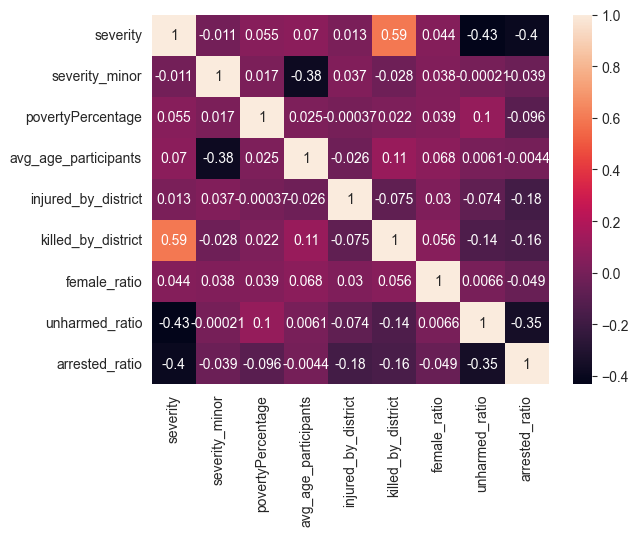

In [66]:
# drop the columns that we don't need
df_incidents_clustering = df_incidents[cols_to_keep]
# plot the correlation matrix
corr = df_incidents_clustering.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True,)
plt.show()

In [77]:
#entropy of each feature
from scipy.stats import entropy
for col in df_incidents_clustering.columns:
    print(col, entropy(df_incidents_clustering[col].value_counts(normalize=True)))

severity 1.7956650922159259
severity_minor 0.6268543426343197
povertyPercentage 4.196778770579486
avg_age_participants 3.7711105226070347
injured_by_district 2.4580168104859417
killed_by_district 1.405061114861665
female_ratio 0.8009352971961268
unharmed_ratio 1.0218680058812415
arrested_ratio 1.1845176761837728


## Scaling and PCA

In [67]:
scaler = StandardScaler()
df_incidents_scaled = scaler.fit_transform(df_incidents_clustering)
df_incidents_scaled = pd.DataFrame(df_incidents_scaled, columns=df_incidents_clustering.columns)
df_incidents_scaled.describe()



,severity,severity_minor,povertyPercentage,avg_age_participants,injured_by_district,killed_by_district,female_ratio,unharmed_ratio,arrested_ratio
count,1.645070e+05,1.645070e+05,1.645070e+05,1.645070e+05,1.645070e+05,1.645070e+05,1.645070e+05,1.645070e+05,1.645070e+05
mean,1.503954e-16,-5.226262e-17,2.095256e-16,-2.349658e-16,-1.382152e-18,1.382152e-18,7.662305e-17,-3.127119e-17,-1.384312e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.088116e+00,-3.253409e-01,-2.629409e+00,-2.421067e+00,-4.936819e-01,-4.435441e-01,-4.344347e-01,-5.688986e-01,-7.299500e-01
25%,-1.088116e+00,-3.253409e-01,-6.602944e-01,-7.307109e-01,-4.936819e-01,-4.435441e-01,-4.344347e-01,-5.688986e-01,-7.299500e-01
50%,1.045354e-01,-3.253409e-01,-1.133182e-01,-2.477520e-01,-4.936819e-01,-4.435441e-01,-4.344347e-01,-5.688986e-01,-7.299500e-01
75%,3.033105e-01,-3.253409e-01,5.430532e-01,4.766864e-01,3.938710e-02,-6.255982e-02,-4.344347e-01,6.676569e-01,5.053104e-01
max,1.694737e+00,6.709114e+00,3.350864e+00,5.306276e+00,4.303939e+00,4.128267e+00,3.621059e+00,2.522490e+00,1.740571e+00


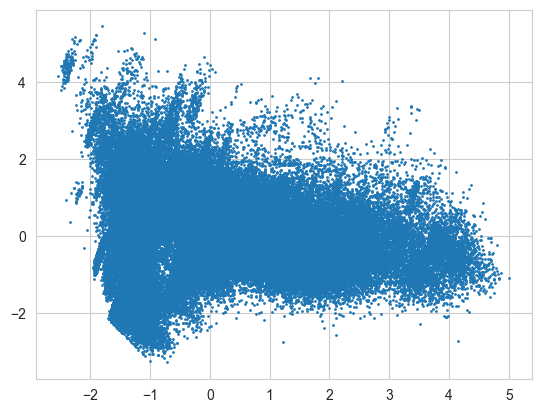

In [68]:
# pca in order to reduce the dimensionality of the dataset
pca = PCA(n_components=2)
df_incidents_pca = pca.fit_transform(df_incidents_scaled)
# plot the results
plt.scatter(df_incidents_pca[:,0], df_incidents_pca[:,1], s=1)



## K-means

### Selecting the number of clusters with the elbow method

In order to select the k number of clusters, we can use the elbow method: we run k-means for different values of k, and by plotting the SSE, we can see the elbow point, which is the optimal number of clusters.

In [69]:
# elbow method to find the optimal number of clusters
kmeans=[]
SSE = []
for i in range(1, 21):
    kmeans.append( KMeans(n_clusters=i, random_state=0, n_init=5).fit(df_incidents_scaled) )
    SSE.append(kmeans[i-1].inertia_)



([<matplotlib.axis.XTick at 0x1bdf14d03d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

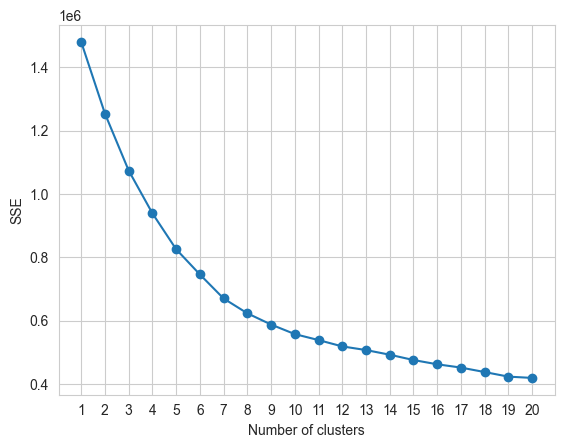

In [70]:
plt.plot( range(1,21),SSE, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
# change numbers on x axis
plt.xticks(np.arange(1, 21, step=1))

In [45]:
# #plot characteristics of each cluster
# for i in range(1,20):
#     labels = kmeans[i].labels_
#     df_incidents['cluster'] = labels
#     sns.countplot(data=df_incidents, x='cluster', hue='incident_characteristics1')
#     plt.show()


KeyboardInterrupt



In [71]:
#we choose 5 clusters
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10).fit(df_incidents_scaled)
df_incidents['cluster'] = kmeans.labels_
df_incidents['cluster'].value_counts()



0    55775
3    37156
2    36854
1    34722
Name: cluster, dtype: int64

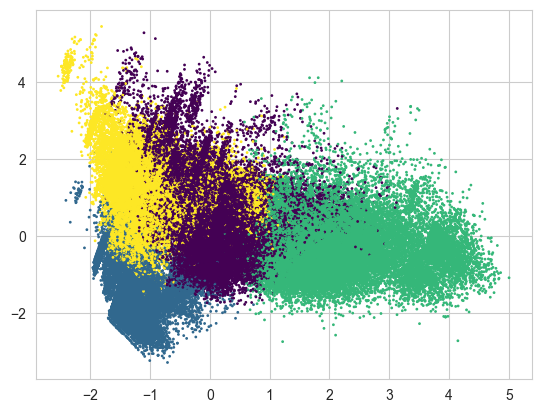

In [73]:
plt.scatter(df_incidents_pca[:,0], df_incidents_pca[:,1], c=df_incidents['cluster'], s=1, cmap='viridis')

NameError: name 't' is not defined

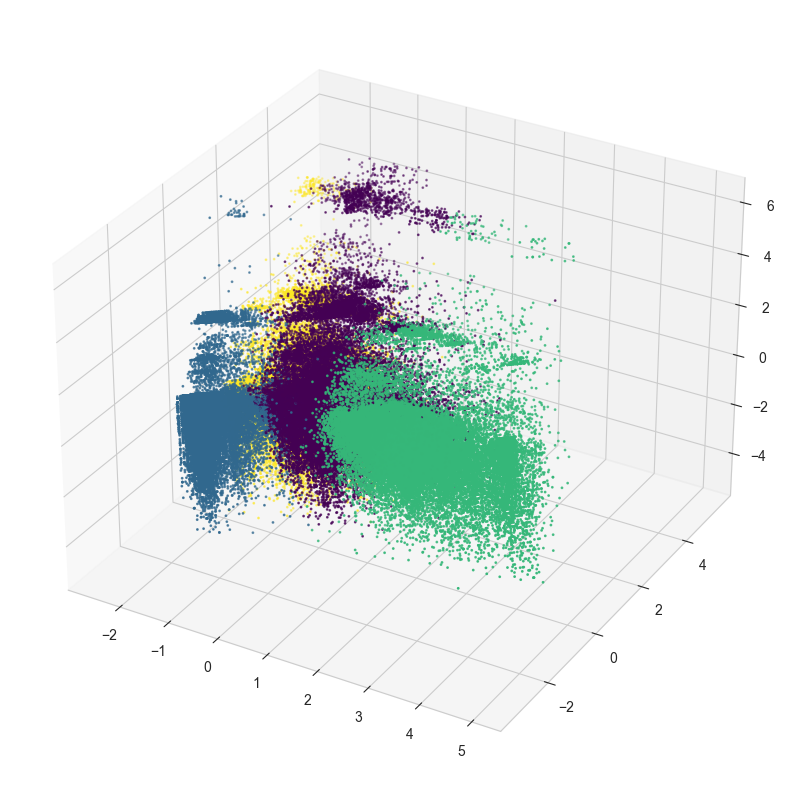

In [76]:
#plot 3d
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
pca= PCA(n_components=3)
df_incidents_pca = pca.fit_transform(df_incidents_scaled)
ax.scatter(df_incidents_pca[:,0], df_incidents_pca[:,1], df_incidents_pca[:,2], c=df_incidents['cluster'], s=1, cmap='viridis')

In [ ]:
sns.countplot(data=df_incidents, x='cluster', hue='incident_characteristics1')


We notice that 3 of the 4 clusters seem to have captured three different types of incidents, while the fourth cluster is a mix of the other three. We also notice how the characteristics of `shots fires - no injuries` and `non shooting accident` may be very similar, because the majority of them is in the same cluster.

## DBSCAN
Now we try to use DBSCAN to cluster the data. We select the first two states in terms of number of incidents, and we try to cluster them.

In [9]:
df_california = df_incidents[df_incidents['state']=='california']
df_texas = df_incidents[df_incidents['state']=='texas']


In [10]:
scaler = StandardScaler()
df_california_scaled = scaler.fit_transform(df_california[cols_to_keep])
df_california_scaled = pd.DataFrame(df_california_scaled, columns=cols_to_keep)

df_texas_scaled = scaler.fit_transform(df_texas[cols_to_keep])
df_texas_scaled = pd.DataFrame(df_texas_scaled, columns=cols_to_keep)

In [11]:
# pca in order to reduce the dimensionality of the dataset
pca = PCA(n_components=2)
df_california_pca = pca.fit_transform(df_california_scaled)
df_texas_pca = pca.fit_transform(df_texas_scaled)


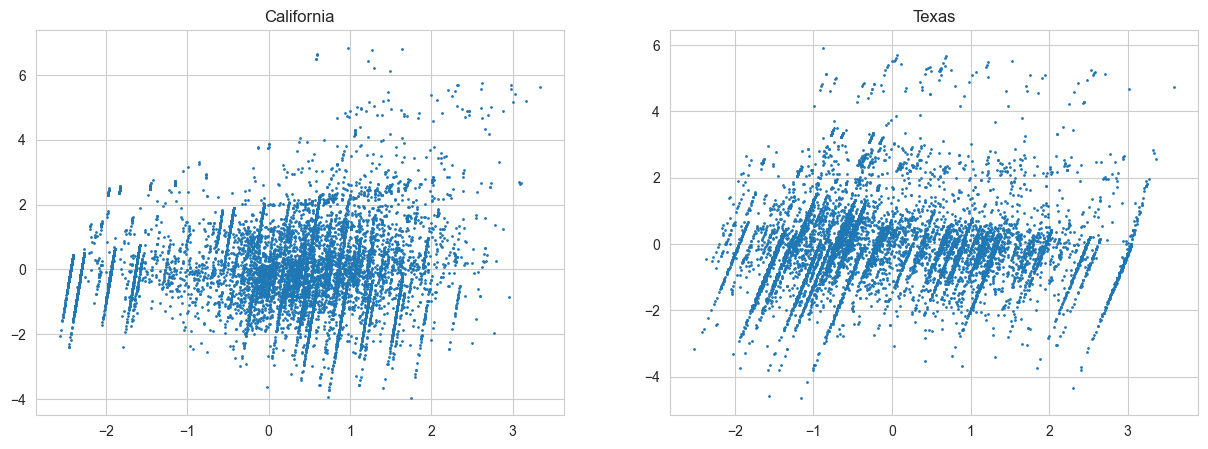

In [12]:
# show the pca results in the two states
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].scatter(df_california_pca[:,0], df_california_pca[:,1], s=1)
ax[0].set_title('California')
ax[1].scatter(df_texas_pca[:,0], df_texas_pca[:,1], s=1)
ax[1].set_title('Texas')
plt.show()


We choose k=5 for both states. In ordeer to find the optimal values for eps, we plot the average distance of each point from its k-th nearest neighbor.


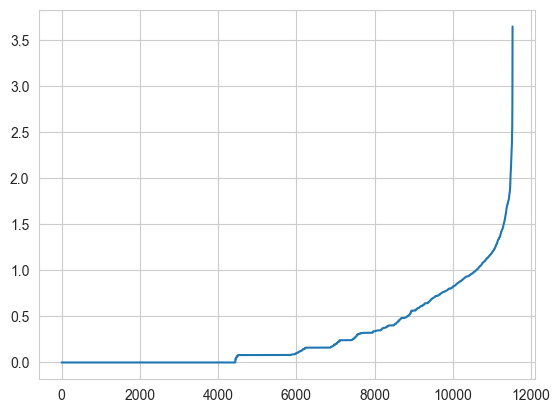

In [16]:
from sklearn.neighbors import NearestNeighbors
k=5
neigh = NearestNeighbors(n_neighbors=100)
nbrs = neigh.fit(df_california_scaled)
distances, indices = nbrs.kneighbors(df_california_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,5]
plt.plot(distances)
plt.show()

In [35]:
db = sklearn.cluster.DBSCAN(eps=1, min_samples=5).fit(df_california_scaled)


In [36]:
df_california['cluster_db'] = db.labels_
df_california['cluster_db'].value_counts()


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_1832\2220985446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_california['cluster_db'] = db.labels_


 0     10306
-1       502
 5       288
 2       120
 3       108
 1        67
 4        17
 8        17
 7        16
 11       15
 6        14
 16        9
 13        7
 9         6
 18        5
 10        5
 19        5
 14        5
 15        5
 20        4
 17        4
 12        3
Name: cluster_db, dtype: int64

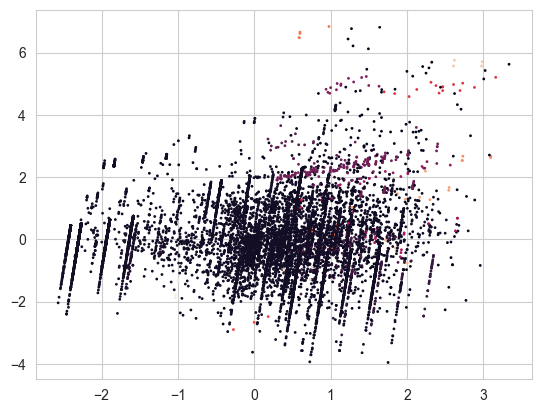

In [37]:
plt.scatter(df_california_pca[:,0], df_california_pca[:,1], c=df_california['cluster_db'], s=1)

<Axes: xlabel='cluster_db', ylabel='count'>

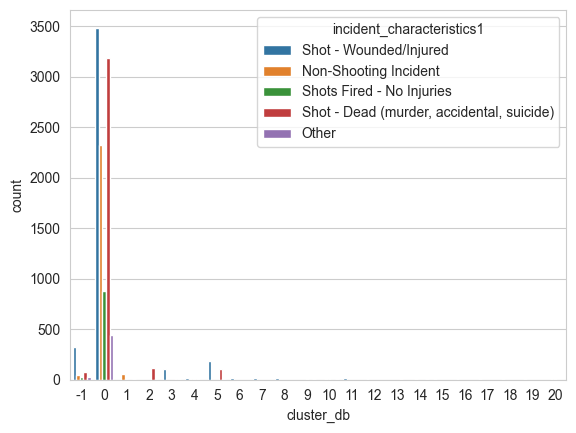

In [38]:
sns.countplot(data=df_california, x='cluster_db', hue='incident_characteristics1')

In [31]:
dbtexas = sklearn.cluster.DBSCAN(eps=0.8, min_samples=30).fit(df_texas_scaled)
df_texas['cluster_db'] = dbtexas.labels_
df_texas['cluster_db'].value_counts()


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_1832\1601276127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_texas['cluster_db'] = dbtexas.labels_


-1     3156
 6     1259
 8      950
 2      937
 10     542
 4      525
 0      345
 3      340
 1      174
 9      146
 5      105
 15      75
 11      62
 14      51
 7       50
 12      46
 13      44
 17      40
 16      35
 18      34
Name: cluster_db, dtype: int64

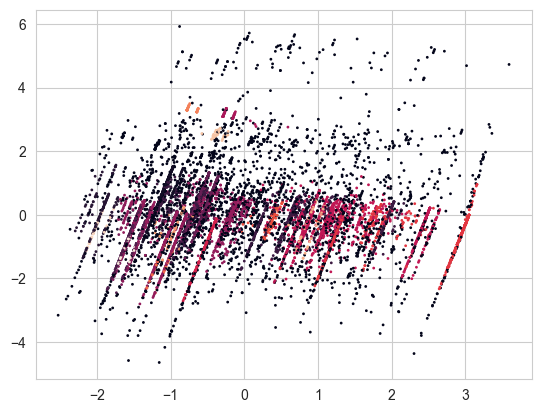

In [32]:
plt.scatter(df_texas_pca[:,0], df_texas_pca[:,1], c=df_texas['cluster_db'], s=1)